<a href="https://colab.research.google.com/github/frankodzia/ai-course-gp/blob/main/Lekcja_18.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [74]:
!pip install scikit-fuzzy

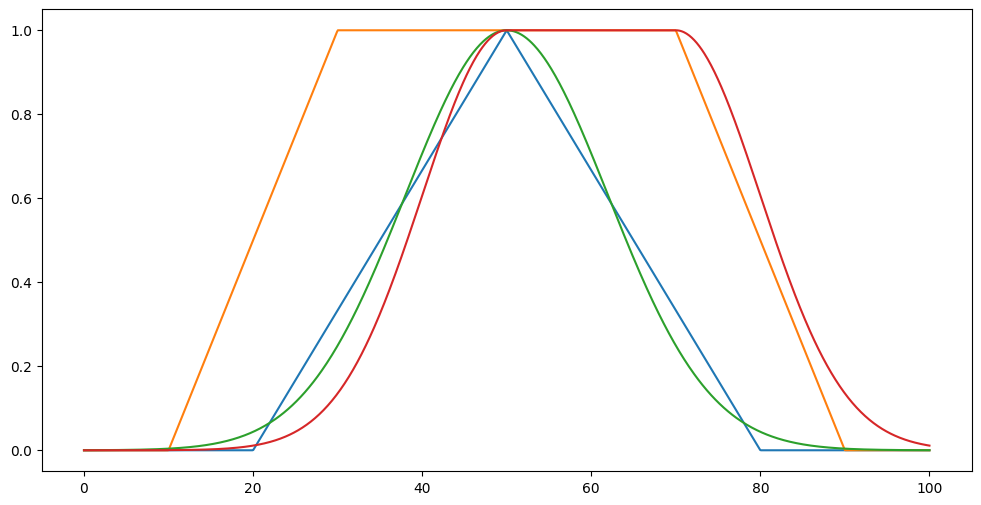

In [75]:
import numpy as np
import matplotlib.pyplot as plt
import skfuzzy as fuzz

x = np.linspace(0,100,1000)

trimf = fuzz.trimf(x,[20,50,80])
trapmf = fuzz.trapmf(x, [10,30,70,90])
gaussmf = fuzz.gaussmf(x, mean=50, sigma=12)
gauss2mf = fuzz.gauss2mf(x, mean1=50, sigma1=10, mean2=70, sigma2=10)

plt.figure(figsize=(12,6))
plt.plot(x, trimf)
plt.plot(x, trapmf)
plt.plot(x, gaussmf)
plt.plot(x, gauss2mf)
plt.show()

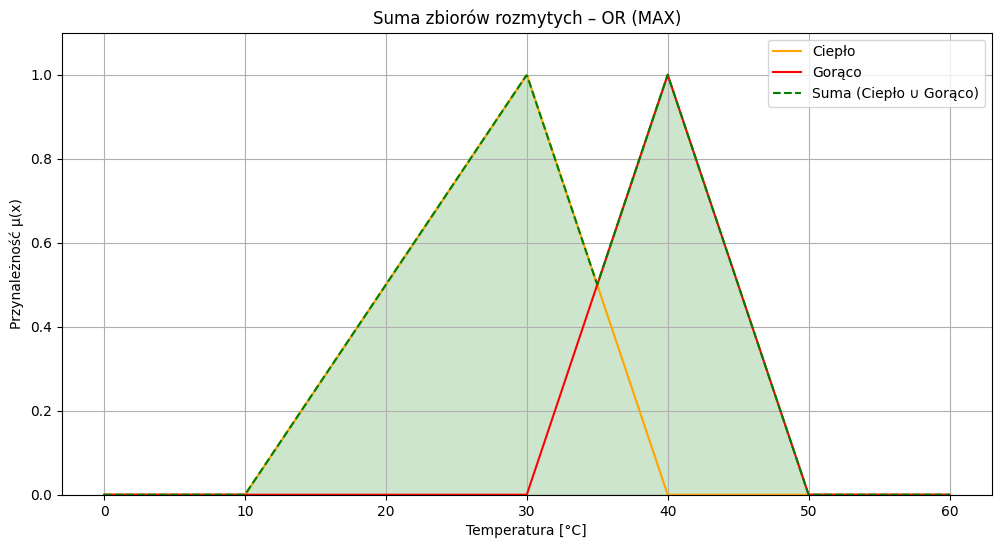

In [76]:
import numpy as np
import matplotlib.pyplot as plt
import skfuzzy as fuzz

# Zakres temperatur
x = np.linspace(0, 60, 1000)

# Definicje zbiorów: trójkątne
cieplo = fuzz.trimf(x, [10, 30, 40])
goraco = fuzz.trimf(x, [30, 40, 50])

# Suma rozmyta (OR)
suma = np.maximum(cieplo, goraco)

# Wykres
plt.figure(figsize=(12, 6))
plt.plot(x, cieplo, label='Ciepło', color='orange')
plt.plot(x, goraco, label='Gorąco', color='red')
plt.plot(x, suma, '--', label='Suma (Ciepło ∪ Gorąco)', color='green')

plt.fill_between(x, 0, suma, color='green', alpha=0.2)

plt.title('Suma zbiorów rozmytych – OR (MAX)')
plt.xlabel('Temperatura [°C]')
plt.ylabel('Przynależność μ(x)')
plt.legend()
plt.grid(True)
plt.ylim(0, 1.1)
plt.show()

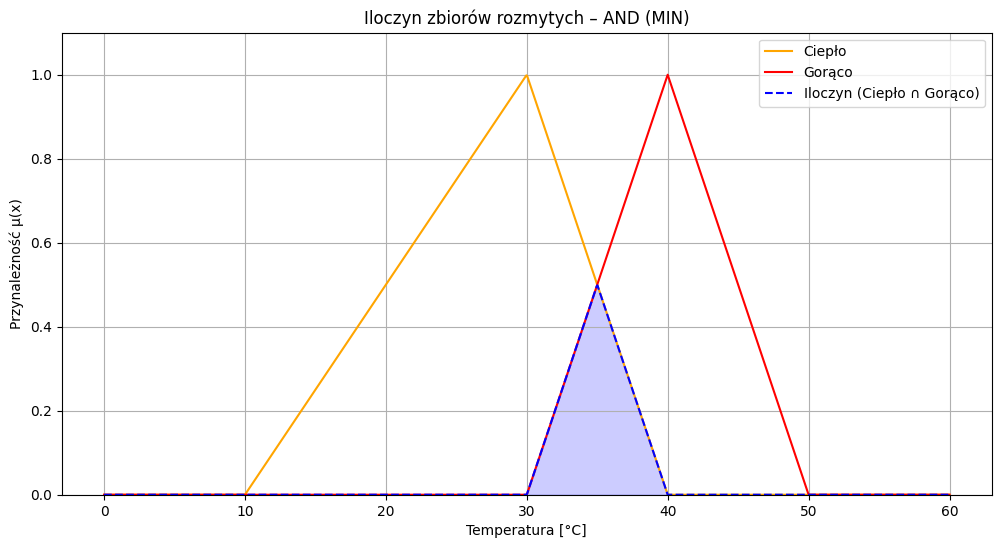

In [77]:
import numpy as np
import matplotlib.pyplot as plt
import skfuzzy as fuzz

# Zakres x (temperatura)
x = np.linspace(0, 60, 1000)

# Dwa zbiory rozmyte: "ciepło" i "gorąco"
cieplo = fuzz.trimf(x, [10, 30, 40])     # Zbiór A
goraco = fuzz.trimf(x, [30, 40, 50])     # Zbiór B

# Iloczyn (AND)
iloczyn = np.minimum(cieplo, goraco)

# Wykres
plt.figure(figsize=(12, 6))
plt.plot(x, cieplo, label='Ciepło', color='orange')
plt.plot(x, goraco, label='Gorąco', color='red')
plt.plot(x, iloczyn, '--', label='Iloczyn (Ciepło ∩ Gorąco)', color='blue')

plt.fill_between(x, 0, iloczyn, color='blue', alpha=0.2)

plt.title('Iloczyn zbiorów rozmytych – AND (MIN)')
plt.xlabel('Temperatura [°C]')
plt.ylabel('Przynależność μ(x)')
plt.legend()
plt.grid(True)
plt.ylim(0, 1.1)
plt.show()

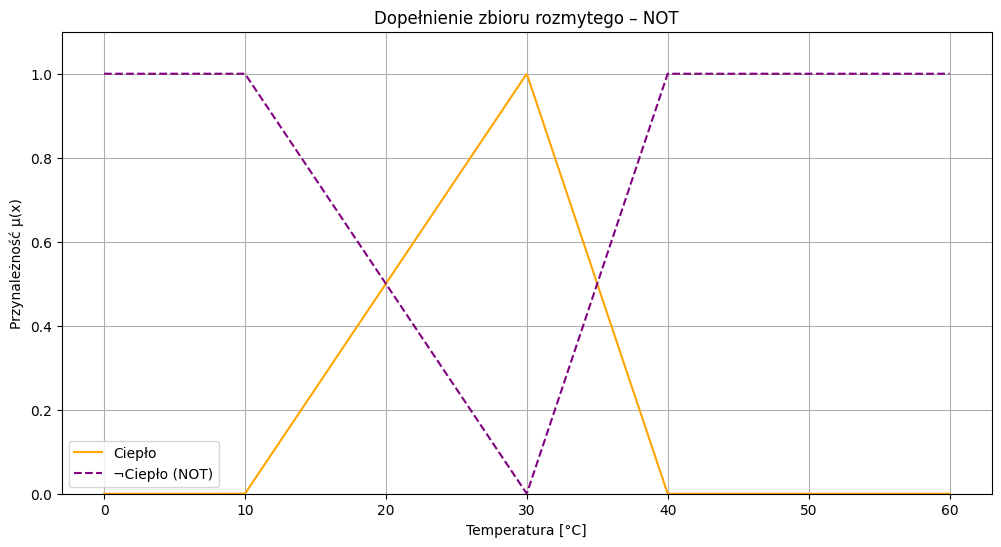

In [78]:
import numpy as np
import matplotlib.pyplot as plt
import skfuzzy as fuzz

# Zakres temperatur
x = np.linspace(0, 60, 1000)

# Zbiór "ciepło" – trójkątna funkcja przynależności
cieplo = fuzz.trimf(x, [10, 30, 40])

# Dopełnienie zbioru – NOT
not_cieplo = 1 - cieplo

# Wykres
plt.figure(figsize=(12, 6))
plt.plot(x, cieplo, label='Ciepło', color='orange')
plt.plot(x, not_cieplo, label='¬Ciepło (NOT)', color='purple', linestyle='--')


plt.title('Dopełnienie zbioru rozmytego – NOT')
plt.xlabel('Temperatura [°C]')
plt.ylabel('Przynależność μ(x)')
plt.legend()
plt.grid(True)
plt.ylim(0, 1.1)
plt.show()

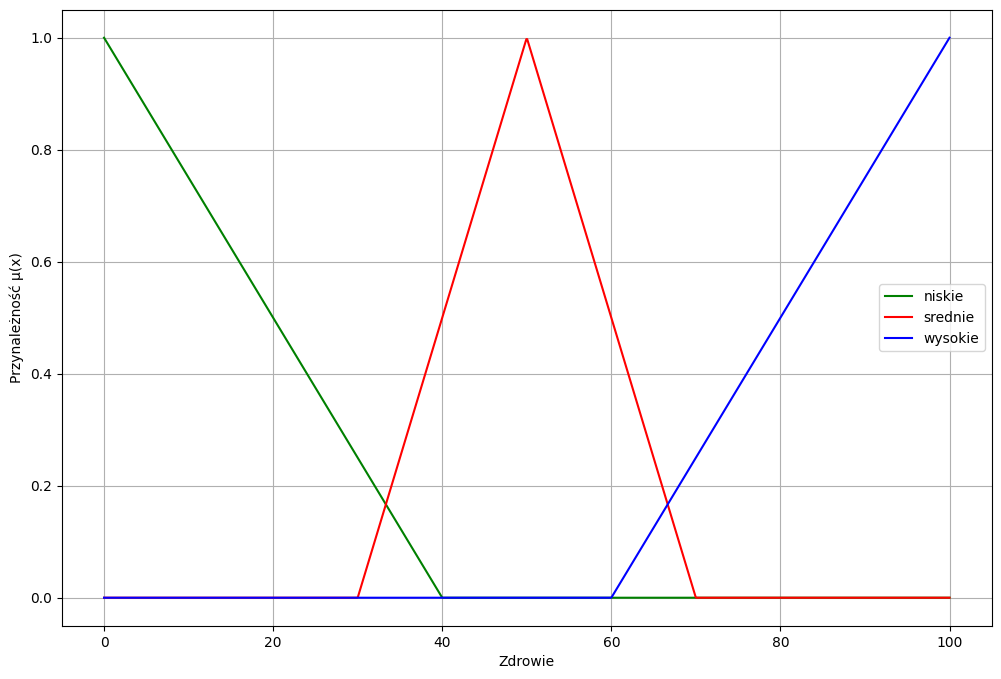

In [79]:
import numpy as np
import matplotlib.pyplot as plt
import skfuzzy as fuzz

x_life = np.linspace(0, 100, 1000)

zycie_niskie = fuzz.trimf(x_life, [0,0,40])
zycie_srednie = fuzz.trimf(x_life, [30,50,70])
zycie_wysokie = fuzz.trimf(x_life, [60,100,100])

plt.figure(figsize=(12,8));
plt.plot(x_life,zycie_niskie, c="green", label="niskie")
plt.plot(x_life,zycie_srednie, c="red",label="srednie")
plt.plot(x_life,zycie_wysokie,c="blue",label="wysokie")
plt.grid(True)
plt.xlabel('Zdrowie')
plt.ylabel('Przynależność μ(x)')
plt.legend()
plt.show()

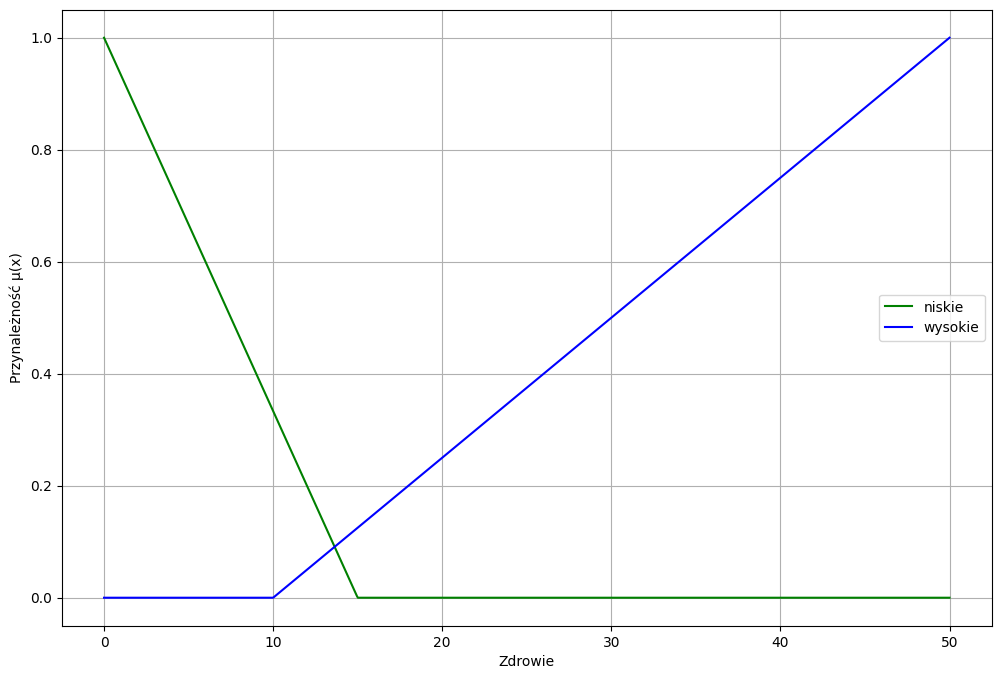

In [80]:
import numpy as np
import matplotlib.pyplot as plt
import skfuzzy as fuzz

x_dist = np.linspace(0, 50, 1000)

dist_niskie = fuzz.trimf(x_dist, [0,0,15])

dist_wysokie = fuzz.trimf(x_dist, [10,50,50])

plt.figure(figsize=(12,8));
plt.plot(x_dist,dist_niskie, c="green", label="niskie")
plt.plot(x_dist,dist_wysokie,c="blue",label="wysokie")

plt.grid(True)
plt.xlabel('Zdrowie')
plt.ylabel('Przynależność μ(x)')
plt.legend()
plt.show()

Poziom ataku: 70.00


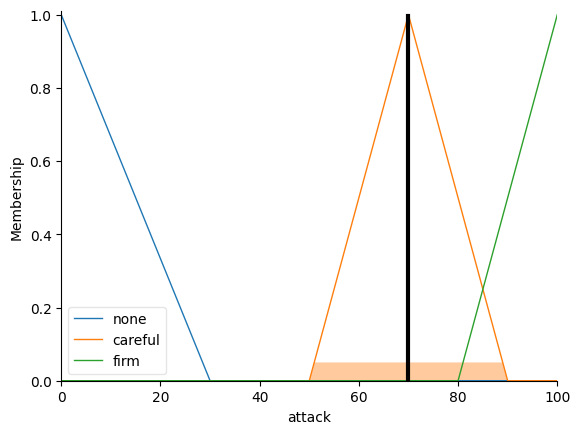

In [94]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

life = ctrl.Antecedent(x_life, 'life')
distance = ctrl.Antecedent(x_dist, 'distance')

attack = ctrl.Consequent(np.linspace(0,100,1000),'attack')

life['low'] = fuzz.trimf(life.universe, [0,0,40])
life['med'] = fuzz.trimf(life.universe, [30,50,70])
life['high'] = fuzz.trimf(life.universe, [60,100,100])

distance['close'] = fuzz.trimf(distance.universe, [0,0,15])
distance['far'] = fuzz.trimf(distance.universe, [10,50,50])


attack['none'] = fuzz.trimf(attack.universe, [0, 0, 30])
attack['careful'] = fuzz.trimf(attack.universe, [50, 70, 90])
attack['firm'] = fuzz.trimf(attack.universe, [80, 100, 100])

rule1 = ctrl.Rule(life['low'], attack['firm'])
rule2 = ctrl.Rule(life['med'] & distance['close'], attack['careful'])
rule3 = ctrl.Rule(life['med'] & distance['far'], attack['careful'])
rule4 = ctrl.Rule(life['high'] & distance['close'], attack['none'])

# Zbudowanie systemu rozmytego
attack_ctrl = ctrl.ControlSystem([rule1, rule2, rule3, rule4])
attack_sim = ctrl.ControlSystemSimulation(attack_ctrl)

# Wprowadzenie danych wejściowych
attack_sim.input['life'] = 69
attack_sim.input['distance'] = 50

# Oblicz wynik
attack_sim.compute()

# Wyświetl wynik
print(f"Poziom ataku: {attack_sim.output['attack']:.2f}")
attack.view(sim=attack_sim)